In [1]:
import sys
sys.path.insert(1,'../python_code')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import trapmodels
import kidcalc

from kidata import io,plot,calc,noise,filters

Supplemental Material
---

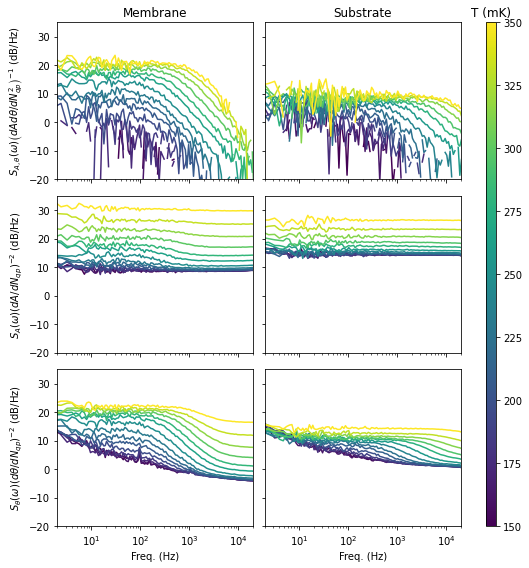

In [12]:
importlib.reload(plot)
fig,axs = plt.subplots(3,2,figsize=(8,8),sharex='col',sharey='row')

Tmin = 150
Tmax = 350
for i,(KIDnum,subs) in enumerate(zip([2,3],['Membrane','Substrate'])):
    plot.spec('LT165',[KIDnum],pltPread=[99],spec='all',Tminmax=(Tmin,Tmax),
              lvlcomp='Resp',
              ax12=axs[:,i:i+1].T,clbar=False)
    
for j,(ylabel,ylim) in enumerate(zip([r'$S_{A,\theta}(\omega)\left(dAd\theta/dN_{qp}^2\right)^{-1}$',
                          r'$S_{A}(\omega)\left(dA/dN_{qp}\right)^{-2}$',
                          r'$S_{\theta}(\omega)\left(d\theta/dN_{qp}\right)^{-2}$'],
                                    [(-120,-75),
                                    (-107,-87),
                                    (-95,-63)])):
    axs[j,0].set_ylabel(ylabel + ' (dB/Hz)')
    axs[j,1].set_ylabel('')
    axs[j,0].set_ylim(-20,35)

    
    for k in range(2):
        axs[j,k].set_title('')
        axs[j,k].set_xlim(2e0,2e4)
        
for ax in [axs[0,0],axs[1,0],axs[1,1],axs[0,1]]:
    ax.set_xlabel('')
axs[0,0].set_title('Membrane')
axs[0,1].set_title('Substrate')

fig.tight_layout()

clb = plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(Tmin,Tmax),
                                               matplotlib.cm.get_cmap('viridis')),ax=axs,aspect=50)
clb.ax.set_title('T (mK)')
fig.savefig('../figures/AllPSDs.pdf')

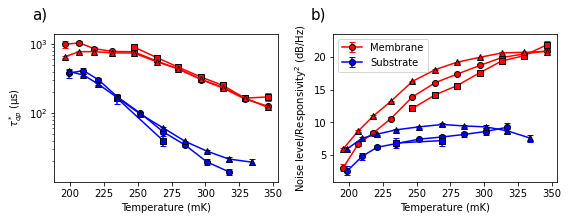

In [13]:
importlib.reload(calc)
importlib.reload(plot)
importlib.reload(filters)
Tmax = 350
Tmin = 190
Pread = 99

fig,axs = plt.subplots(1,2,figsize=(8,3.2),sharex=True)
for i,(KIDnum,clr,ax,l1) in enumerate(zip([2,3],['r','b'],
                                       [axs,axs],['Membrane','Substrate'])):  
    for spec,fmt,l2 in zip(['cross','amp','phase'],['o','s','^'],
                           [r' $S_{A,\theta}$',r' $S_{A}$',r' $S_{\theta}$']):
        plot.ltnlvl('LT165',[KIDnum],[Pread],Tminmax=(Tmin,Tmax),lvlcomp='Resp',
                    spec=spec,delampNoise=(spec!='cross'),
                    ax12=ax,color=clr,label=l1,fmt=fmt+'-',tescPread=[Pread],
                   pltkaplan=False,pltthlvl=False,relerrthrs=.16,
                    showfit=False,tescpltkaplan=False)
axs[1].set_ylabel(r'Noise level/Responsivity$^{2}$ (dB/Hz)')
handles,labels  = axs[1].get_legend_handles_labels()
axs[1].legend([handles[0],handles[3]],[labels[0],labels[3]])
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.1,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/Allfits.pdf')

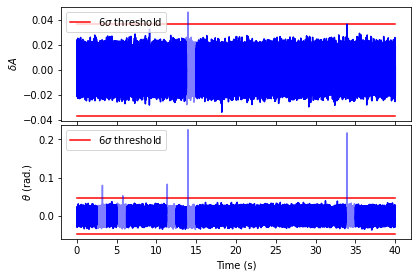

In [14]:
rawnoise = io.get_noisebin('LT165',2,99,141)

Amp,Phase = noise.to_ampphase(rawnoise)
Amp = 1-Amp
fig,axs = plt.subplots(2,1,figsize=(6,4),sharex=True)
for data,ax in zip([Amp,Phase],axs):
    _,rejs = noise.rej_pulses(data)
    
    segdata = np.array(np.array_split(noise.subtr_offset(data),32))
    ax.plot([0,40],np.ones(2)*6*segdata.std(1).min(),'r',label='$6\sigma$ threshold')
    ax.plot([0,40],-1*np.ones(2)*6*segdata.std(1).min(),'r')
    t = np.linspace(0,len(segdata[0])/5e4,len(segdata[0])) 
    for seg,rej in zip(segdata,rejs):
        ax.plot(t,seg,'b',alpha=.5 if rej else 1)
        t+=1.25+2e-5
        
for ax,ylabel in zip(axs,['$\delta A$','$\\theta$ (rad.)']):
    ax.legend()
    ax.set_ylabel(ylabel)
    
axs[1].set_xlabel('Time (s)')
fig.tight_layout(h_pad=0)
fig.savefig('../figures/TimeTracePulseRej.pdf')

../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


(7.163047057358997e-05, 3.5359293852038065e-05)


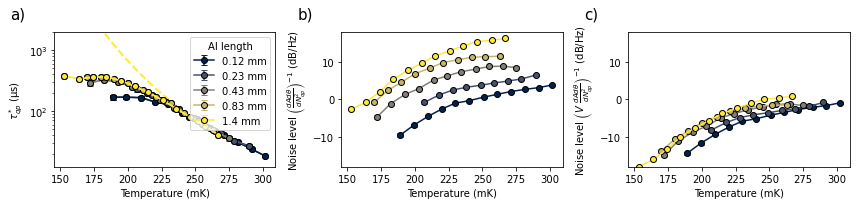

In [111]:
importlib.reload(plot)
importlib.reload(kidcalc)
fig,axs = plt.subplots(1,3,figsize=(12,3))
cmap = matplotlib.cm.get_cmap('cividis')
norm = matplotlib.colors.Normalize(np.log10(.12),np.log10(1.4))
relerrthrs = .1
for KIDnum,Pread,length in zip([8,4,13,11,1],
                            [112,110,113,112,113],
                           [.12,.23,.43,.83,1.4]):
    plot.ltnlvl('LT179',KIDnum,[Pread],color=cmap(norm(np.log10(length))),ax12=[axs[0],axs[2]],
              relerrthrs=relerrthrs,lvlcomp='RespV')
    plot.ltnlvl('LT179',KIDnum,[Pread],color=cmap(norm(np.log10(length))),ax12=axs[:2],
                relerrthrs=relerrthrs,pltkaplan=(KIDnum == 1),tescTminmax=(240,300),
                lvlcomp='Resp',label=f'{length} mm',showfit=False)

    if KIDnum == 1:
        print(calc.tesc('LT179',KIDnum,reterr=True))
axs[0].legend(title='Al length')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[2].set_ylabel(r'Noise level $\left(V~\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[1].set_ylim(-18,18)
axs[2].set_ylim(-18,18)
for ax,letter in zip(axs,['a)','b)','c)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/LengthVariation.pdf')

../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')
../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


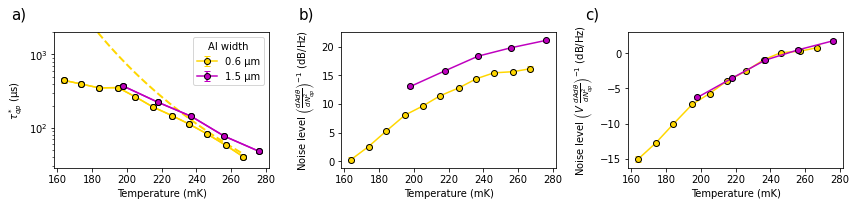

In [88]:
importlib.reload(plot)
fig,axs = plt.subplots(1,3,figsize=(12,3))

for Chipnum,width,Pread,clr in zip(['LT179','LT179Wide'],
                           [.6,1.5],[113,105],['gold','m']):
    plot.ltnlvl(Chipnum,1,[Pread],color=clr,ax12=[axs[0],axs[2]],relerrthrs=.11,
               lvlcomp='RespV')
    
    plot.ltnlvl(Chipnum,1,[Pread],color=clr,ax12=axs[:2],relerrthrs=.11,
                pltkaplan=(Chipnum == 'LT179'),pltthlvl=False,lvlcomp='Resp',
                label=f'{width} µm',showfit=False)
axs[0].legend(title='Al width')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
axs[2].set_ylabel(r'Noise level $\left(V~\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)','c)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/WidthVariation.pdf')

../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


21.00493504191086 1.255


../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -96 dBm instead of -97 dBm
  warnings.warn(f'No S21data at this Pread. '+
../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


10.975488276932538 1.35


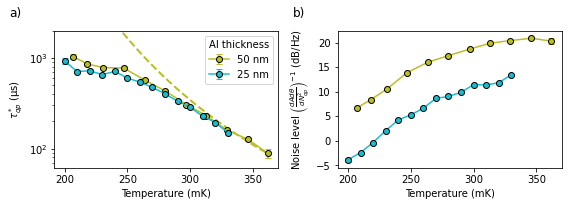

In [87]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

for Chipnum,d,Pread,clr in zip(['LT165','LT165W2'],
                           [50,25],[99,97],['tab:olive','tab:cyan']):
    plot.ltnlvl(Chipnum,2,[Pread],color=clr,ax12=axs,relerrthrs=.13,
                pltkaplan=(Chipnum == 'LT165'),pltthlvl=False,lvlcomp='Resp',
                label=f'{d} nm',showfit=False)
    print((1+calc.tesc(Chipnum,2)/.28e-3),io.get_S21data(Chipnum,2,Pread)[0,21])
axs[0].legend(title='Al thickness')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=12)
fig.tight_layout()
fig.savefig('../figures/ThicknessVariation5025.pdf')

../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -96 dBm instead of -98.0 dBm
  warnings.warn(f'No S21data at this Pread. '+
../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -92 dBm instead of -94.0 dBm
  warnings.warn(f'No S21data at this Pread. '+
../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -88 dBm instead of -90.0 dBm
  warnings.warn(f'No S21data at this Pread. '+
../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -84 dBm instead of -86.0 dBm
  warnings.warn(f'No S21data at this Pread. '+
../python_code\kidata\io.py:107: UserWarning: No S21data at this Pread. Closest value is selected: -80 dBm instead of -82.0 dBm
  warnings.warn(f'No S21data at this Pread. '+


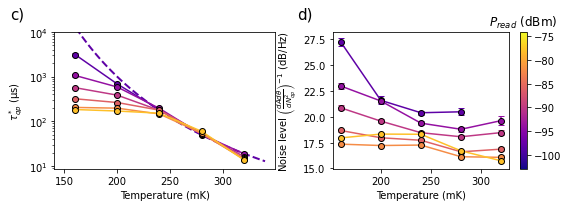

In [167]:
importlib.reload(plot)
importlib.reload(calc)

fig,axs = plot.ltnlvl('LT145',6,lvlcomp='Resp',Tminmax=(150,340),
                relerrthrs=.12,minfreq=2e1,decades=2,
                pltkaplan=True,tescPread='min',tescTminmax=(240,400),showfit=False)
axs[0].set_ylim(None,1e4)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.2,1.1,letter,transform=ax.transAxes,size=15)
fig.set_size_inches(8,3)
fig.tight_layout()
axs[0].get_legend().remove()
fig.savefig('../figures/Thickness150.pdf')

../python_code\kidata\calc.py:132: UserWarning: Too little points in window to do fit.
  warnings.warn('Too little points in window to do fit.')


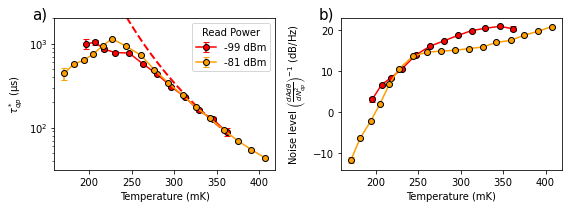

In [78]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

cmap = matplotlib.cm.get_cmap('autumn')
norm = matplotlib.colors.Normalize(-99,-70)
for Pread in [99,81]:
    plot.ltnlvl('LT165',2,[Pread],color=cmap(norm(-1*Pread)),ax12=axs,relerrthrs=.2,
                pltkaplan=(Pread == 99),lvlcomp='Resp',
                label=f'-{Pread} dBm',showfit=False)
axs[0].legend(title='Read Power')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['a)','b)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/ReadPower.pdf')

0.00022385545287457578


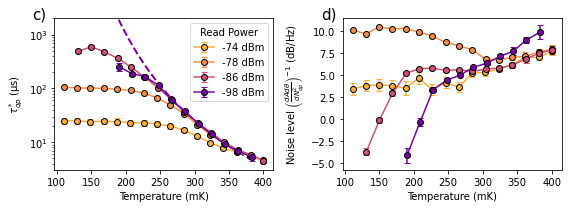

In [79]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,2,figsize=(8,3))

cmap = matplotlib.cm.get_cmap('plasma')
norm = matplotlib.colors.Normalize(-98*1.1,-74*.9)
for Pread in [74,78,86,98]:
    plot.ltnlvl('LT179Wide',8,[Pread],color=cmap(norm(-1*Pread)),ax12=axs,relerrthrs=.2,
                pltkaplan=(Pread == 98),tescPread='min',lvlcomp='Resp',
                label=f'-{Pread} dBm',showfit=False)
    if Pread == 98:
        print(calc.tesc('LT179Wide',8,'min'))
axs[0].legend(title='Read Power')
axs[0].set_ylim(None,2e3)
axs[1].set_ylabel(r'Noise level $\left(\frac{dAd\theta}{dN_{qp}^2}\right)^{-1}$ (dB/Hz)')
for ax,letter in zip(axs,['c)','d)']):
    ax.text(-.1,1,letter,transform=ax.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/ReadPowerExcessQPs.pdf')

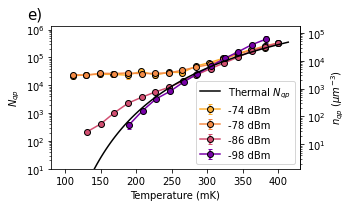

In [85]:
importlib.reload(plot)
importlib.reload(calc)
fig,axs = plt.subplots(1,1,figsize=(5,3))

cmap = matplotlib.cm.get_cmap('plasma')
norm = matplotlib.colors.Normalize(-98*1.1,-74*.9)
for Pread in [74,78,86,98]:
    plot.Nqp('LT179Wide',8,[Pread],clr=cmap(norm(-1*Pread)),fig=fig,ax=axs,
                pltThrm=(Pread == 74),nqpaxis=(Pread==74),label=f'-{Pread} dBm')
axs.legend()
axs.set_ylim(1e1,None)
axs.text(-.1,1.05,'e)',transform=axs.transAxes,size=15)
fig.tight_layout()
fig.savefig('../figures/ReadPowerExcessQPsNqp.pdf')

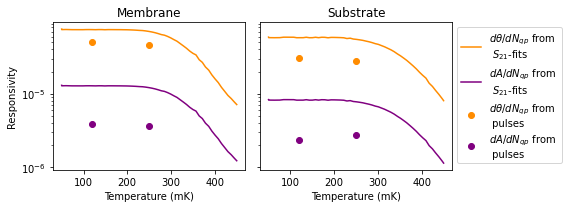

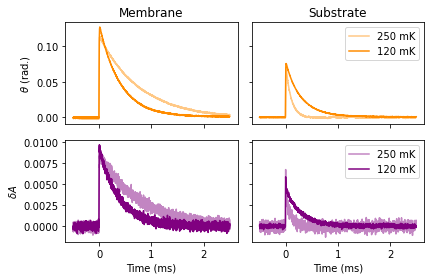

In [89]:
Chipnum = 'LT165'
fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True)
fig2,axs2 = plt.subplots(2,2,figsize=(6,4),sharey='row',sharex='col')
for KIDnum,Pread,ax,ax2 in zip([2,3],[85,83],axs,[axs2[:,0],axs2[:,1]]):

    #S21
    S21data = io.get_S21data(Chipnum,KIDnum,Pread)
    ax.plot(S21data[:,1]*1e3,S21data[:,10],'-',color='darkorange',
           label='$d\\theta/dN_{qp}$ from \n $S_{21}$-fits')
    ax.plot(S21data[:,1]*1e3,S21data[:,18],'-',color='purple',
           label='$dA/dN_{qp}$ from \n $S_{21}$-fits')
    ax.set_yscale('log')

    #Pulse
    for T in [250,120]:
        phase,amp = io.get_pulsedata(Chipnum,KIDnum,Pread,T,1545)
        t = np.arange(len(phase))-500
        dNqp = .59*6.582e-4*3e8*2*np.pi/1.545/(1.76*86.17*S21data[0,21])
        ax.plot(T,phase.max()/dNqp,'o',color='darkorange',
               label='$d\\theta/dN_{qp}$ from \n pulses')
        ax.plot(T,-1*amp.min()/dNqp,'o',color='purple',
               label='$dA/dN_{qp}$ from \n pulses')
        ax2[0].plot(t*1e-3,phase,
                    color='darkorange',label=f'{T} mK',alpha=120/T)
        ax2[1].plot(t*1e-3,-1*amp,
                    color='purple',label=f'{T} mK',alpha=120/T)
    ax.set_xlabel('Temperature (mK)')

handles,labels = axs[1].get_legend_handles_labels()
labels = dict(zip(labels,handles))
axs[1].legend(labels.values(),labels.keys(),bbox_to_anchor=(1,1))
axs[0].set_ylabel('Responsivity')
axs[0].set_title('Membrane')
axs[1].set_title('Substrate')
fig.tight_layout()
fig.savefig('Resp.pdf')

axs2[0,0].set_title('Membrane')
axs2[0,1].set_title('Substrate')
axs2[0,0].set_ylabel('$\\theta$ (rad.)')
axs2[1,0].set_ylabel('$\delta A$ ')
axs2[0,1].legend()
axs2[1,1].legend()
axs2[1,0].set_xlabel('Time (ms)')
axs2[1,1].set_xlabel('Time (ms)')
fig2.tight_layout()
fig2.savefig('../figures/Pulses.pdf')